In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk import ngrams
from nltk import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer 
from sklearn import metrics


import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk import ngrams
from nltk import word_tokenize
from keras.preprocessing.text import Tokenizer
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
import re
from bs4 import BeautifulSoup
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup

Using TensorFlow backend.


In [2]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk import ngrams
from nltk import word_tokenize
import string
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from nltk.stem import PorterStemmer 
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
import re
from bs4 import BeautifulSoup

In [3]:
df = pd.read_csv("test-text-labels.csv",header=None)

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,sad\t Isn't it [#TRIGGERWORD#] that this is on...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,fear\tuhh actually couldn't sleep well last ni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,surprise\tPeople where just [#TRIGGERWORD#] be...,"he clearly said ""You"". #EastEnders #EELive",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,fear\t Hello! hit their target yesterday and ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,fear\tShe doesnt have tonbe [#TRIGGERWORD#] be...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28507 entries, 0 to 28506
Data columns (total 13 columns):
0     28507 non-null object
1     5619 non-null object
2     1210 non-null object
3     269 non-null object
4     57 non-null object
5     21 non-null object
6     7 non-null object
7     2 non-null object
8     1 non-null object
9     0 non-null float64
10    0 non-null float64
11    0 non-null float64
12    1 non-null object
dtypes: float64(3), object(10)
memory usage: 2.8+ MB


In [6]:
df.info

<bound method DataFrame.info of                                                       0   \
0      sad\t Isn't it [#TRIGGERWORD#] that this is on...   
1      fear\tuhh actually couldn't sleep well last ni...   
2      surprise\tPeople where just [#TRIGGERWORD#] be...   
3      fear\t Hello!  hit their target yesterday and ...   
4      fear\tShe doesnt have tonbe [#TRIGGERWORD#] be...   
5      fear\tI think they're running [#TRIGGERWORD#] ...   
6      disgust\tIm almost [#TRIGGERWORD#] because you...   
7      fear\tIf I’m ever quiet around you be worried ...   
8      fear\tIt to late to rewind.  It’s to late for ...   
9      anger\t     People are [#TRIGGERWORD#] because...   
10     disgust\tI am [#TRIGGERWORD#] that I just turn...   
11     fear\tI was looking so hard at my comp screen ...   
12     fear\tDude don't make me choose. And I'm [#TRI...   
13     disgust\tBlehh i think its so [#TRIGGERWORD#] ...   
14                     fear\tAs a gooner & an Englishman   
15     j

In [7]:
'''for i in range (len(df)):
    text=df[0][i].split('\t')[0]
    text[1].replace("[#TRIGGERWORD#]", text[0])
    text[1].replace('@USERNAME','')
    new_df[1][i]=text[1]
    new_df[0][i]=text[0]
    print(text)'''

'for i in range (len(df)):\n    text=df[0][i].split(\'\t\')[0]\n    text[1].replace("[#TRIGGERWORD#]", text[0])\n    text[1].replace(\'@USERNAME\',\'\')\n    new_df[1][i]=text[1]\n    new_df[0][i]=text[0]\n    print(text)'

In [8]:
for i in range(2,13):

    df = df.drop(i, 1)

In [9]:
'''col = [0,1]
new_df = df[col]
new_df = new_df[pd.notnull(df[1])]
new_df.columns = ['Text','Emotion']
new_df.head()'''

"col = [0,1]\nnew_df = df[col]\nnew_df = new_df[pd.notnull(df[1])]\nnew_df.columns = ['Text','Emotion']\nnew_df.head()"

In [10]:
for i in range (len(df)):
    text=df[0][i].split('\t')
    df[1][i]=text[1].replace('[#TRIGGERWORD#]','')
    df[0][i]=text[0]
    print(text[0])

sad
fear
surprise
fear
fear
fear
disgust
fear
fear
anger
disgust
fear
fear
disgust
fear
joy
surprise
anger
surprise
sad
fear
sad
anger
fear
fear
sad
disgust
anger
sad
fear
joy
disgust
surprise
disgust
surprise
fear
anger
surprise
joy
fear
fear
sad
anger
anger
disgust
surprise
surprise
joy
surprise
surprise
surprise
anger
joy
surprise
surprise
sad
surprise
anger
fear
surprise
fear
fear
anger
joy
sad
anger
sad
sad
anger
joy
disgust
disgust
surprise
sad
anger
sad
joy
surprise
sad
joy
anger
disgust
joy
disgust
fear
fear
disgust
anger
fear
surprise
joy
disgust
sad
fear
anger
fear
fear
joy
anger
anger
joy
joy
fear
joy
fear
disgust
joy
anger
anger
fear
fear
joy
anger
anger
surprise
anger
sad
anger
fear
joy
fear
joy
disgust
disgust
sad
anger
disgust
joy
sad
surprise
disgust
surprise
anger
disgust
fear
joy
sad
sad
sad
joy
disgust
fear
fear
sad
sad
joy
surprise
joy
anger
disgust
disgust
anger
disgust
fear
surprise
sad
joy
sad
anger
disgust
disgust
sad
anger
fear
disgust
anger
anger
fear
joy
sad


sad
surprise
surprise
anger
anger
surprise
sad
joy
surprise
anger
disgust
joy
fear
joy
surprise
joy
sad
sad
joy
fear
fear
disgust
joy
surprise
anger
sad
anger
disgust
joy
surprise
anger
anger
joy
joy
fear
anger
disgust
joy
sad
fear
fear
fear
surprise
sad
sad
anger
disgust
surprise
joy
joy
disgust
anger
fear
anger
disgust
sad
fear
sad
joy
disgust
anger
joy
fear
surprise
surprise
fear
disgust
anger
surprise
anger
fear
joy
joy
surprise
sad
sad
disgust
anger
surprise
surprise
surprise
sad
sad
surprise
joy
joy
anger
fear
disgust
fear
joy
disgust
sad
disgust
joy
surprise
surprise
fear
anger
joy
anger
sad
sad
anger
joy
disgust
joy
anger
sad
fear
sad
surprise
sad
joy
joy
surprise
fear
joy
joy
surprise
sad
joy
fear
fear
surprise
fear
sad
disgust
fear
disgust
disgust
fear
surprise
joy
joy
joy
joy
anger
disgust
surprise
fear
sad
surprise
sad
disgust
joy
joy
anger
joy
joy
anger
surprise
joy
surprise
joy
anger
disgust
fear
anger
fear
fear
fear
disgust
surprise
joy
fear
anger
surprise
anger
joy
disg

fear
joy
sad
joy
disgust
disgust
fear
surprise
disgust
anger
anger
anger
sad
surprise
joy
disgust
anger
surprise
surprise
joy
anger
fear
joy
joy
sad
anger
anger
surprise
sad
fear
sad
surprise
anger
disgust
sad
surprise
surprise
fear
joy
anger
surprise
joy
anger
sad
joy
fear
disgust
disgust
joy
surprise
surprise
disgust
sad
sad
fear
sad
anger
surprise
fear
disgust
anger
surprise
disgust
joy
sad
sad
anger
joy
anger
anger
disgust
joy
joy
fear
disgust
joy
sad
disgust
fear
disgust
joy
sad
joy
fear
joy
joy
sad
sad
sad
anger
surprise
disgust
joy
fear
fear
disgust
surprise
fear
anger
joy
sad
disgust
surprise
fear
disgust
disgust
fear
anger
fear
anger
joy
surprise
anger
anger
sad
surprise
joy
fear
sad
fear
disgust
joy
sad
joy
surprise
fear
disgust
surprise
joy
anger
surprise
fear
fear
sad
sad
surprise
anger
anger
sad
surprise
sad
fear
surprise
joy
joy
anger
joy
fear
disgust
anger
fear
disgust
surprise
surprise
joy
disgust
sad
joy
fear
disgust
anger
joy
fear
disgust
sad
sad
fear
sad
disgust
fear

anger
anger
anger
anger
surprise
joy
anger
sad
joy
anger
fear
sad
fear
joy
anger
anger
sad
surprise
fear
sad
surprise
anger
disgust
sad
surprise
fear
disgust
anger
sad
fear
disgust
fear
joy
anger
joy
surprise
joy
surprise
surprise
disgust
surprise
joy
fear
surprise
surprise
surprise
surprise
sad
anger
joy
fear
joy
disgust
fear
sad
anger
fear
disgust
disgust
surprise
disgust
fear
fear
joy
disgust
anger
fear
fear
sad
surprise
surprise
anger
fear
joy
anger
surprise
disgust
anger
joy
fear
fear
sad
disgust
disgust
fear
surprise
anger
anger
sad
disgust
joy
surprise
fear
surprise
sad
fear
sad
sad
sad
surprise
fear
disgust
fear
disgust
disgust
surprise
fear
surprise
joy
joy
disgust
disgust
fear
sad
sad
disgust
fear
anger
disgust
sad
joy
anger
surprise
surprise
anger
disgust
disgust
anger
sad
fear
anger
disgust
fear
anger
fear
sad
joy
surprise
fear
sad
sad
fear
anger
anger
joy
joy
anger
joy
disgust
disgust
disgust
anger
sad
fear
fear
joy
anger
anger
surprise
sad
joy
surprise
disgust
fear
anger


fear
disgust
disgust
disgust
anger
joy
anger
anger
sad
disgust
surprise
surprise
anger
sad
disgust
fear
surprise
disgust
anger
fear
fear
sad
disgust
anger
fear
surprise
anger
joy
disgust
joy
sad
disgust
disgust
surprise
disgust
fear
disgust
surprise
joy
sad
surprise
fear
joy
joy
joy
joy
surprise
surprise
surprise
surprise
surprise
joy
fear
disgust
disgust
anger
surprise
joy
surprise
fear
joy
joy
sad
anger
anger
joy
sad
disgust
surprise
joy
sad
sad
joy
surprise
fear
joy
joy
surprise
joy
anger
joy
fear
disgust
anger
sad
joy
anger
sad
anger
joy
fear
sad
joy
surprise
disgust
joy
anger
surprise
sad
disgust
surprise
surprise
anger
surprise
sad
sad
anger
anger
sad
surprise
joy
joy
fear
sad
joy
fear
joy
sad
sad
sad
joy
joy
disgust
joy
fear
joy
joy
joy
joy
sad
joy
joy
surprise
fear
surprise
fear
anger
joy
joy
sad
surprise
surprise
disgust
joy
fear
joy
anger
joy
fear
sad
anger
disgust
fear
sad
fear
joy
joy
joy
surprise
disgust
disgust
sad
surprise
sad
surprise
sad
sad
joy
sad
joy
sad
joy
disgust

surprise
sad
fear
anger
joy
joy
disgust
anger
joy
fear
surprise
sad
sad
anger
sad
fear
fear
disgust
disgust
joy
disgust
joy
fear
anger
sad
anger
sad
fear
disgust
fear
disgust
disgust
joy
joy
fear
sad
surprise
fear
anger
joy
joy
sad
surprise
surprise
joy
anger
fear
disgust
sad
disgust
sad
disgust
fear
surprise
anger
fear
surprise
disgust
anger
joy
joy
disgust
fear
surprise
joy
joy
joy
joy
joy
disgust
surprise
fear
disgust
disgust
disgust
sad
anger
disgust
joy
disgust
joy
joy
joy
joy
surprise
disgust
anger
anger
fear
disgust
anger
surprise
sad
anger
sad
sad
disgust
fear
fear
fear
joy
disgust
anger
fear
fear
fear
surprise
anger
fear
disgust
anger
sad
anger
surprise
joy
anger
anger
anger
sad
disgust
anger
anger
fear
disgust
anger
joy
anger
fear
surprise
fear
disgust
disgust
joy
fear
anger
surprise
sad
disgust
anger
surprise
fear
surprise
joy
fear
sad
surprise
disgust
anger
anger
sad
fear
sad
sad
fear
anger
anger
sad
surprise
joy
disgust
joy
surprise
disgust
sad
surprise
surprise
anger
fear

disgust
sad
disgust
disgust
joy
fear
fear
anger
fear
fear
joy
fear
anger
anger
joy
anger
fear
anger
joy
disgust
sad
sad
anger
disgust
surprise
disgust
disgust
anger
sad
disgust
joy
sad
joy
sad
joy
surprise
fear
fear
sad
surprise
surprise
disgust
anger
surprise
sad
joy
joy
surprise
sad
anger
joy
fear
surprise
anger
fear
disgust
sad
fear
fear
fear
anger
sad
disgust
anger
disgust
fear
joy
joy
sad
disgust
disgust
disgust
joy
disgust
joy
anger
fear
sad
anger
fear
disgust
disgust
joy
sad
sad
joy
anger
joy
disgust
disgust
surprise
surprise
anger
sad
joy
sad
surprise
disgust
joy
surprise
disgust
joy
disgust
disgust
anger
disgust
joy
fear
surprise
anger
disgust
disgust
disgust
sad
surprise
surprise
fear
disgust
joy
surprise
surprise
surprise
joy
anger
disgust
sad
surprise
fear
fear
joy
anger
joy
sad
surprise
joy
sad
anger
anger
joy
surprise
sad
joy
fear
anger
sad
sad
disgust
disgust
joy
anger
sad
anger
sad
sad
disgust
disgust
anger
surprise
anger
anger
joy
fear
fear
fear
fear
sad
joy
surprise
f

fear
joy
surprise
sad
surprise
anger
joy
fear
anger
anger
disgust
anger
fear
fear
anger
disgust
sad
fear
joy
sad
disgust
disgust
fear
joy
fear
fear
disgust
sad
sad
fear
anger
disgust
sad
anger
anger
disgust
sad
disgust
disgust
anger
disgust
disgust
joy
anger
surprise
anger
joy
surprise
joy
surprise
fear
anger
disgust
fear
sad
joy
sad
fear
fear
surprise
joy
joy
joy
fear
surprise
disgust
joy
joy
surprise
anger
fear
joy
fear
fear
disgust
anger
surprise
joy
disgust
joy
fear
anger
fear
sad
disgust
joy
joy
sad
surprise
surprise
anger
joy
joy
surprise
sad
disgust
disgust
disgust
sad
surprise
disgust
joy
anger
surprise
disgust
fear
fear
surprise
disgust
fear
disgust
fear
sad
surprise
joy
disgust
anger
joy
sad
surprise
fear
fear
disgust
surprise
surprise
anger
joy
anger
anger
anger
disgust
surprise
fear
surprise
sad
fear
surprise
surprise
surprise
anger
fear
disgust
sad
disgust
joy
surprise
disgust
disgust
sad
anger
fear
surprise
disgust
fear
surprise
disgust
fear
sad
joy
anger
joy
sad
disgust


anger
surprise
joy
joy
sad
surprise
joy
surprise
anger
fear
disgust
surprise
disgust
anger
disgust
sad
sad
fear
joy
surprise
anger
joy
fear
sad
fear
disgust
disgust
fear
disgust
fear
anger
joy
sad
sad
surprise
fear
fear
joy
disgust
sad
surprise
joy
anger
anger
fear
joy
anger
disgust
joy
disgust
surprise
disgust
disgust
surprise
sad
joy
surprise
joy
surprise
disgust
anger
anger
anger
sad
fear
disgust
anger
joy
disgust
surprise
surprise
anger
disgust
anger
joy
surprise
sad
surprise
surprise
anger
disgust
sad
joy
surprise
sad
disgust
sad
anger
anger
sad
surprise
sad
surprise
joy
disgust
fear
surprise
disgust
anger
fear
sad
disgust
fear
sad
surprise
surprise
anger
disgust
surprise
surprise
anger
surprise
surprise
surprise
joy
anger
surprise
anger
joy
anger
sad
fear
surprise
sad
disgust
joy
anger
surprise
anger
disgust
fear
surprise
sad
sad
sad
joy
surprise
surprise
fear
joy
fear
anger
sad
anger
joy
sad
anger
surprise
joy
sad
joy
disgust
fear
disgust
disgust
surprise
disgust
surprise
disgus

sad
joy
anger
sad
sad
joy
sad
sad
anger
anger
sad
sad
sad
joy
sad
sad
anger
anger
surprise
anger
fear
fear
anger
surprise
disgust
disgust
anger
joy
sad
anger
joy
disgust
disgust
disgust
anger
anger
fear
fear
disgust
disgust
surprise
joy
joy
fear
surprise
disgust
joy
surprise
sad
surprise
anger
joy
joy
surprise
joy
disgust
fear
joy
anger
sad
anger
surprise
joy
anger
disgust
fear
sad
joy
anger
disgust
fear
joy
disgust
sad
surprise
surprise
disgust
surprise
surprise
fear
surprise
sad
fear
anger
fear
disgust
sad
joy
joy
fear
joy
anger
joy
fear
anger
sad
surprise
sad
surprise
surprise
fear
surprise
surprise
fear
fear
fear
joy
surprise
surprise
sad
sad
sad
sad
anger
sad
sad
surprise
disgust
sad
surprise
sad
surprise
joy
surprise
anger
joy
disgust
disgust
joy
anger
joy
fear
sad
joy
fear
joy
surprise
anger
anger
anger
fear
fear
joy
anger
sad
joy
anger
sad
fear
sad
disgust
fear
fear
joy
surprise
joy
disgust
surprise
sad
anger
fear
surprise
disgust
joy
sad
anger
disgust
surprise
surprise
joy
sur

anger
joy
joy
joy
sad
fear
surprise
fear
surprise
anger
disgust
fear
surprise
joy
anger
joy
sad
disgust
joy
disgust
anger
anger
sad
fear
anger
anger
joy
anger
disgust
joy
disgust
anger
fear
surprise
joy
sad
joy
surprise
anger
fear
disgust
surprise
surprise
sad
sad
sad
surprise
sad
disgust
anger
disgust
fear
joy
anger
surprise
joy
sad
fear
disgust
fear
surprise
disgust
surprise
anger
joy
fear
fear
surprise
fear
joy
fear
disgust
sad
joy
fear
surprise
disgust
sad
anger
surprise
surprise
sad
joy
disgust
anger
anger
anger
disgust
joy
surprise
anger
surprise
fear
sad
fear
anger
fear
fear
surprise
disgust
fear
anger
joy
fear
fear
sad
anger
disgust
disgust
disgust
anger
anger
fear
joy
fear
disgust
sad
surprise
anger
disgust
disgust
sad
joy
sad
fear
sad
joy
sad
anger
joy
fear
disgust
disgust
sad
sad
surprise
joy
anger
sad
surprise
disgust
anger
joy
anger
joy
surprise
disgust
sad
anger
sad
disgust
anger
surprise
fear
fear
joy
fear
anger
sad
sad
anger
sad
disgust
joy
surprise
joy
fear
anger
joy
j

fear
surprise
disgust
sad
joy
anger
sad
anger
anger
disgust
anger
surprise
disgust
joy
surprise
surprise
surprise
surprise
joy
sad
anger
joy
disgust
surprise
disgust
disgust
sad
fear
anger
disgust
anger
anger
sad
joy
disgust
disgust
surprise
anger
disgust
anger
fear
joy
sad
disgust
sad
fear
fear
fear
disgust
joy
fear
joy
surprise
sad
anger
joy
anger
disgust
surprise
fear
disgust
joy
joy
joy
disgust
fear
sad
disgust
anger
sad
disgust
fear
surprise
fear
sad
joy
fear
joy
surprise
disgust
joy
surprise
disgust
fear
anger
disgust
sad
disgust
joy
anger
joy
surprise
joy
anger
joy
fear
surprise
fear
anger
sad
sad
surprise
surprise
fear
anger
surprise
sad
surprise
joy
joy
surprise
surprise
sad
fear
joy
joy
surprise
surprise
sad
joy
fear
disgust
fear
sad
surprise
disgust
disgust
surprise
surprise
sad
joy
sad
surprise
anger
surprise
disgust
joy
anger
sad
joy
joy
anger
surprise
sad
anger
joy
surprise
sad
surprise
surprise
fear
anger
disgust
sad
surprise
disgust
surprise
joy
sad
fear
fear
anger
disg

surprise
disgust
sad
surprise
anger
sad
fear
surprise
joy
anger
fear
anger
disgust
fear
fear
fear
anger
anger
fear
joy
surprise
fear
surprise
surprise
disgust
disgust
sad
anger
joy
disgust
anger
joy
joy
fear
fear
joy
anger
fear
joy
joy
joy
fear
disgust
disgust
joy
anger
anger
joy
anger
disgust
disgust
surprise
fear
fear
joy
sad
surprise
sad
fear
anger
joy
anger
joy
surprise
joy
surprise
sad
joy
surprise
disgust
joy
anger
surprise
disgust
fear
surprise
fear
joy
joy
surprise
anger
fear
joy
disgust
anger
surprise
surprise
surprise
joy
joy
fear
fear
joy
sad
joy
sad
sad
anger
sad
joy
joy
anger
joy
sad
fear
joy
joy
joy
surprise
surprise
disgust
disgust
joy
surprise
anger
joy
surprise
sad
sad
sad
anger
sad
anger
fear
fear
fear
anger
anger
sad
surprise
joy
joy
fear
sad
anger
fear
disgust
sad
disgust
fear
anger
surprise
anger
anger
disgust
joy
anger
joy
disgust
disgust
surprise
sad
joy
anger
sad
surprise
joy
disgust
anger
sad
anger
disgust
sad
anger
sad
joy
anger
surprise
fear
joy
sad
surprise


joy
disgust
sad
anger
anger
anger
anger
joy
joy
anger
joy
sad
sad
surprise
disgust
joy
disgust
fear
surprise
anger
anger
fear
surprise
surprise
anger
anger
anger
disgust
sad
sad
disgust
fear
surprise
anger
fear
disgust
fear
anger
disgust
sad
fear
surprise
fear
anger
anger
disgust
anger
surprise
anger
anger
sad
surprise
fear
anger
surprise
disgust
fear
surprise
fear
disgust
disgust
joy
surprise
joy
sad
fear
joy
surprise
disgust
sad
joy
joy
surprise
disgust
joy
surprise
disgust
disgust
joy
sad
surprise
disgust
fear
fear
disgust
surprise
disgust
anger
joy
fear
fear
surprise
surprise
joy
surprise
fear
surprise
disgust
sad
anger
surprise
disgust
surprise
sad
fear
joy
fear
surprise
fear
joy
anger
joy
surprise
surprise
anger
sad
joy
anger
sad
sad
disgust
disgust
fear
surprise
surprise
surprise
disgust
disgust
joy
disgust
joy
disgust
disgust
sad
sad
disgust
sad
fear
fear
anger
sad
joy
anger
sad
anger
fear
disgust
joy
fear
joy
fear
anger
disgust
anger
surprise
sad
disgust
surprise
fear
surprise

joy
fear
surprise
surprise
joy
disgust
joy
fear
disgust
anger
anger
disgust
joy
joy
disgust
disgust
sad
anger
anger
fear
disgust
sad
joy
surprise
disgust
fear
fear
fear
surprise
sad
joy
fear
anger
sad
joy
sad
surprise
sad
disgust
disgust
joy
surprise
disgust
sad
sad
joy
fear
anger
disgust
fear
sad
anger
joy
disgust
sad
disgust
sad
fear
surprise
fear
fear
fear
disgust
joy
surprise
fear
joy
surprise
anger
joy
surprise
surprise
fear
anger
anger
anger
surprise
surprise
surprise
disgust
surprise
joy
fear
disgust
joy
anger
surprise
anger
fear
joy
disgust
fear
disgust
anger
anger
surprise
joy
disgust
fear
disgust
fear
disgust
joy
joy
sad
anger
sad
joy
joy
joy
anger
anger
fear
fear
sad
sad
anger
joy
disgust
disgust
joy
sad
sad
sad
disgust
fear
anger
anger
fear
disgust
joy
surprise
joy
joy
sad
fear
sad
disgust
fear
surprise
anger
surprise
disgust
sad
surprise
sad
sad
fear
surprise
fear
anger
surprise
joy
disgust
sad
sad
joy
anger
surprise
joy
joy
sad
sad
sad
fear
fear
disgust
sad
anger
joy
surp

joy
fear
surprise
joy
sad
surprise
fear
surprise
sad
fear
disgust
surprise
disgust
anger
disgust
joy
surprise
anger
joy
surprise
anger
surprise
fear
anger
fear
sad
surprise
disgust
surprise
fear
surprise
sad
sad
joy
disgust
fear
sad
joy
sad
joy
fear
anger
sad
fear
surprise
disgust
disgust
sad
anger
joy
disgust
disgust
sad
joy
surprise
anger
fear
joy
anger
anger
sad
joy
fear
joy
fear
joy
anger
disgust
sad
fear
joy
fear
fear
anger
disgust
joy
disgust
sad
joy
surprise
fear
surprise
disgust
joy
sad
disgust
fear
sad
anger
joy
anger
disgust
fear
anger
anger
joy
surprise
surprise
joy
surprise
fear
surprise
fear
joy
surprise
disgust
sad
fear
fear
anger
fear
disgust
fear
sad
fear
fear
fear
sad
sad
disgust
disgust
disgust
disgust
joy
sad
joy
joy
disgust
fear
disgust
surprise
anger
disgust
disgust
fear
surprise
sad
anger
fear
surprise
joy
sad
disgust
disgust
joy
disgust
disgust
anger
joy
sad
fear
sad
sad
surprise
surprise
disgust
fear
disgust
joy
joy
fear
joy
joy
sad
joy
anger
anger
disgust
anger

sad
anger
fear
anger
sad
fear
disgust
anger
disgust
fear
disgust
surprise
sad
joy
surprise
joy
disgust
joy
surprise
joy
fear
disgust
joy
surprise
surprise
fear
anger
surprise
fear
anger
surprise
surprise
sad
anger
joy
surprise
sad
surprise
anger
joy
joy
anger
sad
joy
sad
surprise
disgust
disgust
anger
sad
surprise
disgust
anger
disgust
sad
fear
fear
fear
anger
fear
anger
surprise
surprise
surprise
sad
surprise
anger
joy
joy
fear
fear
disgust
surprise
surprise
surprise
sad
anger
fear
surprise
sad
fear
joy
disgust
joy
surprise
anger
surprise
disgust
surprise
fear
joy
disgust
surprise
disgust
surprise
anger
fear
disgust
surprise
surprise
sad
disgust
disgust
surprise
anger
sad
disgust
joy
sad
anger
joy
fear
surprise
fear
joy
disgust
anger
surprise
disgust
surprise
sad
surprise
joy
surprise
surprise
disgust
sad
sad
sad
fear
joy
fear
fear
surprise
sad
disgust
anger
sad
fear
disgust
disgust
fear
disgust
disgust
surprise
surprise
joy
joy
fear
fear
disgust
anger
fear
joy
anger
joy
disgust
surpr

disgust
joy
surprise
sad
disgust
sad
surprise
anger
joy
fear
anger
anger
surprise
fear
joy
anger
anger
disgust
anger
surprise
fear
disgust
fear
fear
joy
surprise
sad
fear
fear
fear
joy
fear
fear
joy
sad
fear
surprise
sad
fear
disgust
joy
sad
disgust
surprise
fear
disgust
surprise
joy
joy
disgust
sad
sad
surprise
anger
joy
disgust
joy
joy
disgust
anger
disgust
disgust
disgust
surprise
sad
fear
joy
joy
joy
anger
surprise
anger
fear
disgust
disgust
anger
joy
anger
surprise
disgust
disgust
sad
anger
sad
fear
fear
surprise
surprise
sad
anger
joy
anger
surprise
disgust
disgust
surprise
anger
fear
joy
anger
fear
sad
joy
joy
joy
anger
fear
sad
surprise
fear
sad
sad
fear
anger
joy
joy
sad
sad
fear
disgust
disgust
fear
joy
joy
sad
disgust
joy
anger
joy
fear
joy
joy
disgust
fear
disgust
disgust
joy
sad
surprise
disgust
surprise
fear
fear
fear
surprise
fear
disgust
disgust
joy
surprise
sad
fear
surprise
anger
joy
sad
surprise
fear
sad
joy
fear
sad
sad
surprise
surprise
fear
surprise
sad
anger
disg

joy
sad
fear
anger
anger
surprise
sad
fear
fear
anger
anger
fear
surprise
sad
disgust
joy
fear
disgust
surprise
joy
fear
joy
joy
sad
fear
fear
disgust
joy
anger
sad
joy
disgust
anger
surprise
disgust
fear
fear
surprise
sad
surprise
surprise
surprise
joy
surprise
joy
anger
surprise
surprise
disgust
anger
surprise
disgust
disgust
fear
disgust
disgust
surprise
fear
surprise
sad
fear
joy
anger
surprise
joy
anger
sad
surprise
fear
joy
fear
sad
sad
fear
surprise
disgust
joy
fear
anger
joy
sad
anger
surprise
joy
surprise
surprise
anger
fear
fear
anger
disgust
surprise
joy
sad
surprise
disgust
joy
anger
anger
joy
sad
anger
joy
surprise
fear
joy
sad
joy
fear
fear
disgust
joy
fear
surprise
fear
disgust
disgust
joy
disgust
joy
joy
disgust
fear
disgust
sad
fear
surprise
sad
sad
anger
anger
anger
joy
fear
disgust
joy
disgust
fear
surprise
surprise
sad
fear
sad
surprise
disgust
disgust
surprise
anger
anger
disgust
disgust
surprise
joy
joy
fear
surprise
anger
fear
anger
joy
anger
surprise
disgust
ang

In [11]:
df.columns = ['Emotion','Text']

In [12]:
df

,Emotion,Text
0,sad,Isn't it that this is only still a vision?
1,fear,uhh actually couldn't sleep well last night be...
2,surprise,People where just because we are finding out ...
3,fear,Hello! hit their target yesterday and we're ...
4,fear,She doesnt have tonbe because she's the first...
5,fear,I think they're running because they know me....
6,disgust,Im almost because your actions in a way refle...
7,fear,If I’m ever quiet around you be worried or be...
8,fear,It to late to rewind. It’s to late for sorry....
9,anger,People are because of the lies told. Not...


In [13]:
my_tags=['sad','anger','fear','surprise','disgust','joy']

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
df.groupby('Emotion').Text.count().plot.bar(ylim=0)
plt.show()


<Figure size 1000x600 with 1 Axes>

In [15]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [16]:
df['Text'] = df['Text'].apply(clean_text)

C:\Users\armug\Anaconda3_new\lib\site-packages\bs4\__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)


In [17]:
new_df=df.copy()

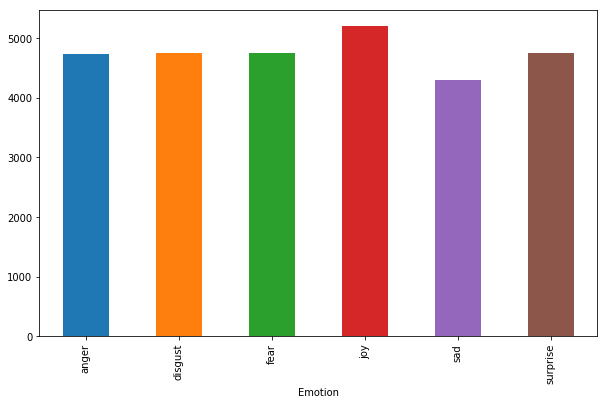

In [18]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
new_df.groupby('Emotion').Text.count().plot.bar(ylim=0)
plt.show()


In [19]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# fix random seed for reproducibility
numpy.random.seed(7)

In [20]:
'''X_train, X_test, Y_train, Y_test=train_test_split(new_df['Text'],new_df['Emotion'], test_size=.05,random_state=1)
'''

"X_train, X_test, Y_train, Y_test=train_test_split(new_df['Text'],new_df['Emotion'], test_size=.05,random_state=1)\n"

In [21]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(new_df['Text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 26557 unique tokens.


In [22]:
X = tokenizer.texts_to_sequences(new_df['Text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (28507, 250)


In [23]:
Y = pd.get_dummies(new_df['Emotion']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (28507, 6)


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.05, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(27081, 250) (27081, 6)
(1426, 250) (1426, 6)


In [25]:
import os

# LSTM and Word Embedding

In [26]:
t = Tokenizer()
t.fit_on_texts(new_df['Text'])
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(new_df['Text'])
print(encoded_docs)
# pad documents to a max length of 500 words
max_length = 500
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)

[[88, 15, 2492], [10810, 25, 278, 242, 80, 75, 142, 25, 261, 302, 2493], [3, 1630, 2172, 209, 41], [1196, 349, 2494, 516, 1564, 422, 5775, 92, 4111], [65, 10811, 85, 53, 465], [14, 52, 646, 8, 1, 175], [1, 300, 1197, 55, 5776, 42, 2321], [1, 58, 1810, 123, 1112, 125, 36, 195, 2173], [411, 7394, 411, 201, 1, 411, 411, 282, 411], [3, 748, 107, 3240], [445, 404, 92, 3641, 482, 1, 15, 1811, 1150], [203, 189, 3642, 1015, 701, 3643, 10812, 51, 3241], [423, 6, 32, 764, 1, 4112, 100, 140, 4113, 4821, 36, 3242], [10813, 14, 557, 2495, 600, 3644], [10814, 10815], [7, 27, 10816, 1358, 197, 164, 8, 1, 43, 667, 517], [7, 3, 21, 76, 1, 7395], [22, 26, 41, 81, 36, 429, 1016], [43, 731, 1419, 280, 1, 3, 94], [95, 323, 3645, 2174, 162, 71, 732], [268, 100, 7396, 978, 1249, 73, 518, 8, 113, 601, 979], [213, 367, 175, 4, 213, 175, 378, 1923], [17, 416, 42, 1198, 446, 3, 6, 35, 180, 503, 303, 589, 49, 446], [1, 22, 192, 109, 207, 3243, 1359], [73, 67, 2679, 126, 32, 614], [39, 20, 1631, 10817, 1420, 331],

In [27]:
BASE_DIR = ''
GLOVE_DIR = os.path.join(BASE_DIR, '')


# first, build index mapping words in the embeddings set
# to their embedding vector

print('Indexing word vectors.')

embeddings_index = {}
with open('glove.6B.300d.txt', encoding="utf8") as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, 'f', sep=' ')
        embeddings_index[word] = coefs

Indexing word vectors.


In [28]:
# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [29]:
len(embedding_matrix)

26558

In [30]:
model = Sequential()
model.add(Embedding(vocab_size, 300, weights=[embedding_matrix], input_length=250, trainable=False))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(Y_train.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.05,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.001)])


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 25726 samples, validate on 1355 samples
Epoch 1/15
25726/25726 [==============================] - 160s 6ms/step - loss: 1.6466 - acc: 0.3159 - val_loss: 1.5318 - val_acc: 0.3911
Epoch 2/15
25726/25726 [==============================] - 173s 7ms/step - loss: 1.5479 - acc: 0.3744 - val_loss: 1.5098 - val_acc: 0.4037
Epoch 3/15
25726/25726 [==============================] - 181s 7ms/step - loss: 1.5006 - acc: 0.3970 - val_loss: 1.4920 - val_acc: 0.4007
Epoch 4/15
25726/25726 [==============================] - 190s 7ms/step - loss: 1.4559 - acc: 0.4222 - val_loss: 1.4686 - val_acc: 0.4133
Epoch 5/15
25726/25726 [==============================] - 193s 7ms/step - loss: 1.4213 - acc: 0.4344 - val_loss: 1.4632 - val_acc: 0.4303
Epoch 6/15
25726/25726 [==

In [31]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1426/1426 [==============================] - 3s 2ms/step
Test set
  Loss: 1.490
  Accuracy: 0.414


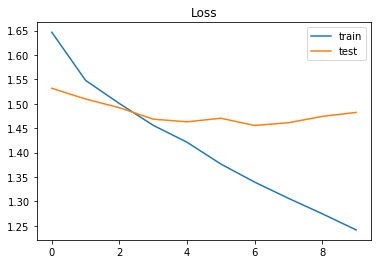

In [32]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

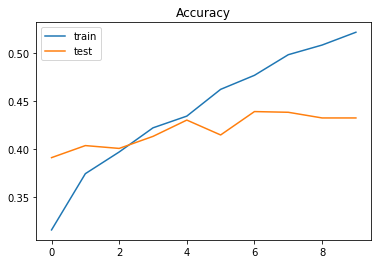

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\armug\Anaconda3_new\lib\asyncio\selector_events.py", line 125, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was f

In [33]:
plt.title('Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show();